In [1]:
import pandas as pd

file_path = 'barefoot1.csv'
df = pd.read_csv(file_path)


In [22]:
channels =['vm_ki', 'ta_ki', 'gm_ki', 'vm ka', 'ta ka', 'gm ka']
df.columns = channels

Creating RawArray with float64 data, n_channels=6, n_times=4000
    Range : 0 ... 3999 =      0.000 ...     4.999 secs
Ready.


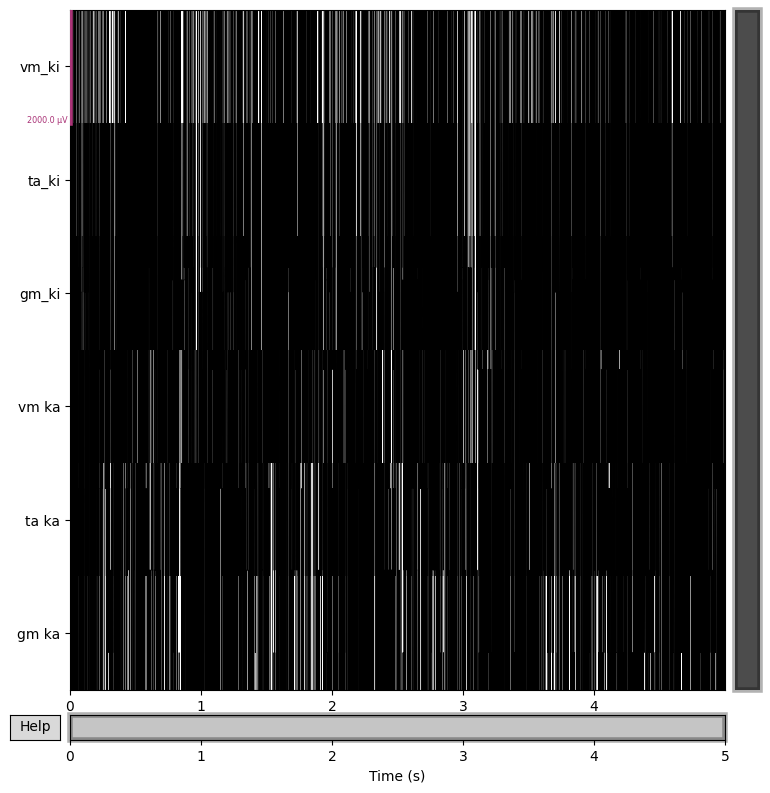

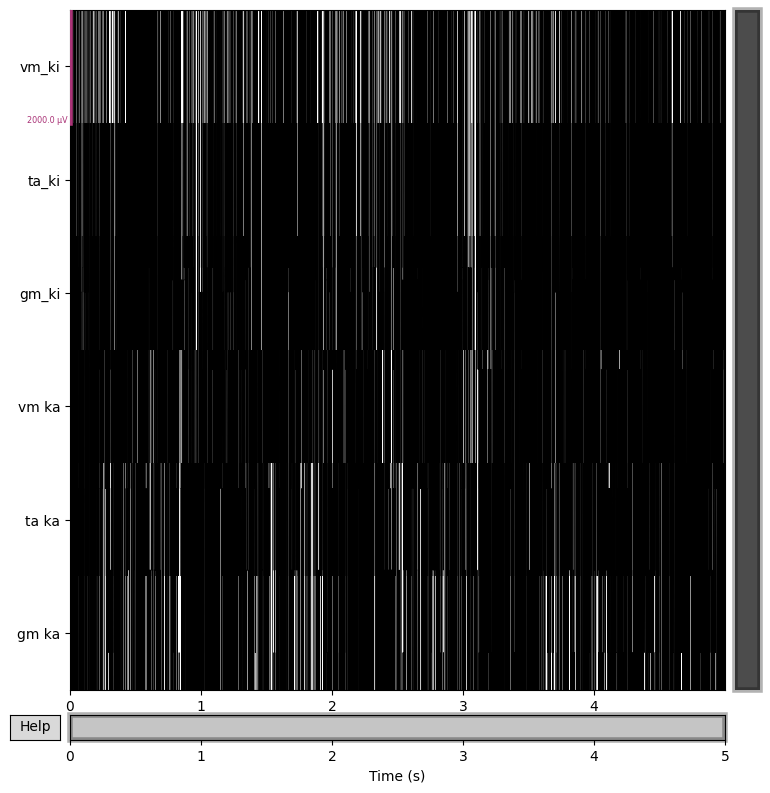

In [23]:
import mne 

s_rate = 800
tipe_ch = len(channels)*['emg']
info = mne.create_info(ch_names=channels, sfreq=s_rate, ch_types=tipe_ch)
dfMNE = df.values.T
raw = mne.io.RawArray(dfMNE, info)
raw.plot()


No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1e+02 - 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 107 samples (0.134 s)



No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 529 samples (0.661 s)



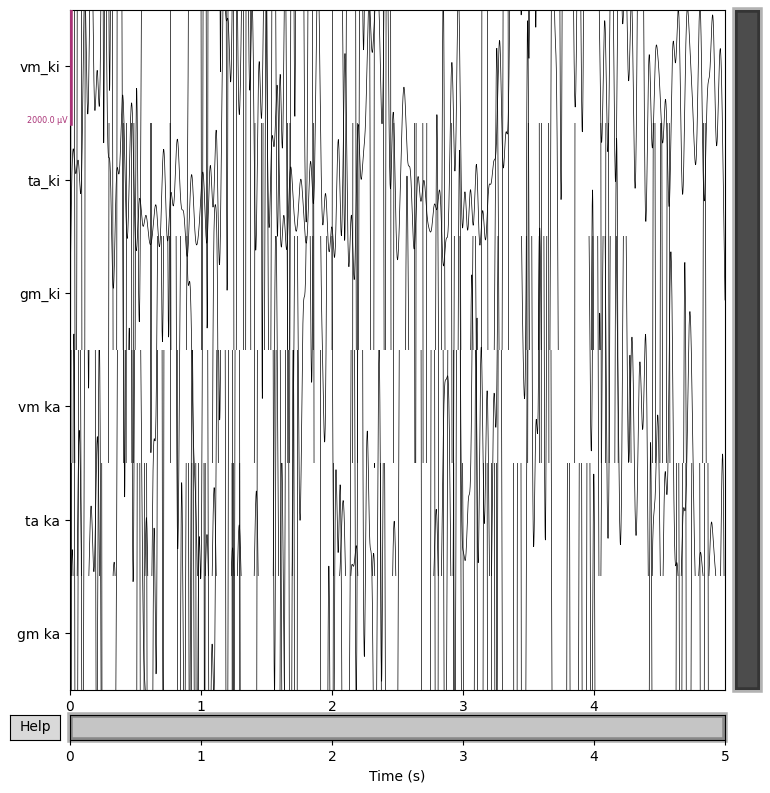

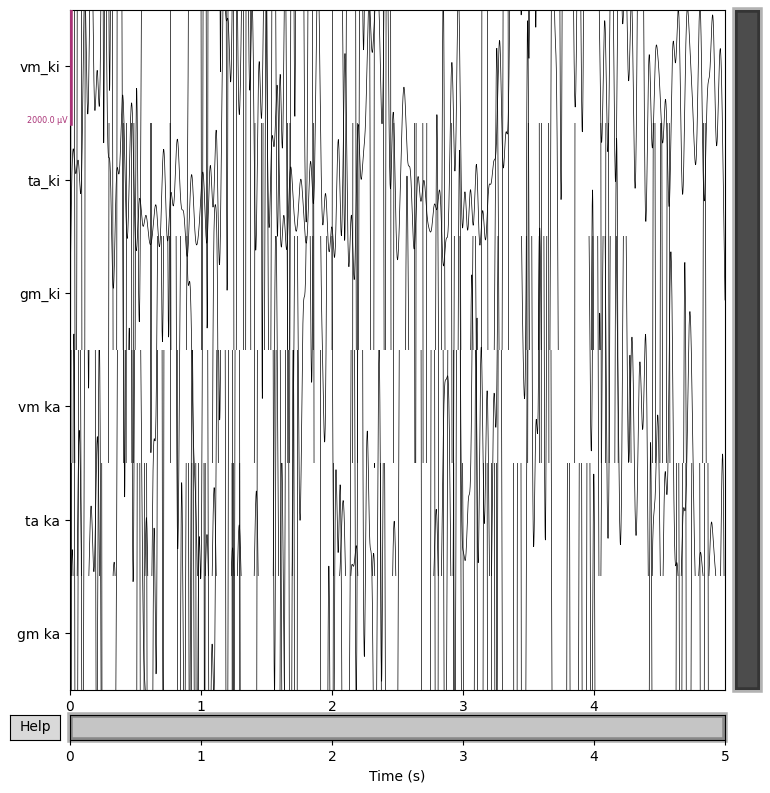

In [24]:
import numpy as np

data_bandpass = raw.copy().filter(l_freq=100, h_freq=200, picks='emg', fir_design='firwin')
data_rectified = data_bandpass.copy()
data_rectified._data = np.abs(data_rectified._data)

data_smooth = data_rectified.copy().filter(l_freq=None, h_freq=20, picks='emg')
data_smooth.plot()

In [26]:
chunk_duration = 0.25 #seconds (ini 1/4 )
sfreq = data_smooth.info['sfreq'] 
samples_per_chunk = int(chunk_duration * sfreq)
n_samples = data_smooth.n_times
data = data_smooth.get_data()
n_chunks = n_samples // samples_per_chunk
chunks =[]
for i in range(n_chunks):
    start = i * samples_per_chunk
    stop = start + samples_per_chunk
    chunk = data[:, start:stop]
    chunks.append(chunk)

In [27]:
results = []
for chunk_idx, chunks in enumerate(chunks):
    chunk_stats = {'chunk' : chunk_idx}
    for channel_idx, channel_data in enumerate(chunks):
        channel_name = data_smooth.ch_names[channel_idx]
        mean_val = np.mean(channel_data)
        var_val = np.var(channel_data)
        zc_val = np.sum(np.diff(np.sign(channel_data)) != 0)
        chunk_stats[f'{channel_name}_mean'] = mean_val
        chunk_stats[f'{channel_name}_var'] = var_val
        chunk_stats[f'{channel_name}_zc'] = zc_val
    results.append(chunk_stats)
df_results = pd.DataFrame(results)
df_results.to_excel('nama_file_bebas.xlsx',index=False)
        

In [28]:
#nyimpen data yg sudha di smut ke excel
data = data_smooth.get_data()
channel_names = data_smooth.ch_names
times = data_smooth.times

dfsmooth = pd.DataFrame(data.T, columns=channel_names, index=times)
dfsmooth.to_excel('data_sudah_di_smut_cuy.xlsx')